In [2]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
import mpmath as mp
import pickle
from scipy.stats import binom
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [3]:
%run ../cow.py

# Loudest Talker

CPU times: user 9.23 s, sys: 194 ms, total: 9.43 s
Wall time: 9.68 s


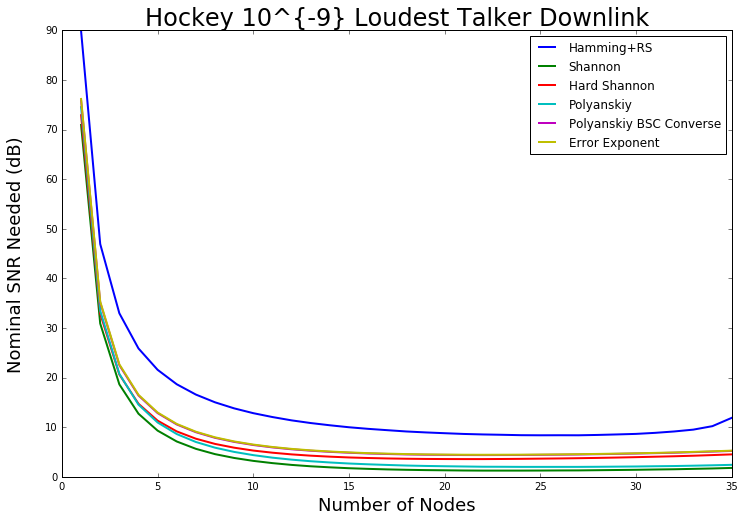

In [6]:
%%time
dSNR = 0.01
target = 10**(-9)
paddratio = 0.1 # padd = 10**(-10)
start_SNR = 0
start_nodes, end_nodes = 1, 36

shannonscheme = '../data_tables/shannon_tables'
hardshannonscheme = '../data_tables/hard_shannon_tables'
hsrsscheme = '../data_tables/hs_rs_downlink'
polyscheme = '../data_tables/polyanskiy_down'
bscscheme = '../data_tables/poly_bsc_converse/down'
expscheme = '../data_tables/error_exp/down'

shannon_down = loudest_talker(shannonscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
hardshannon_down = loudest_talker(hardshannonscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
hsrs_down = loudest_talker(hsrsscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
polyanskiy_down = loudest_talker(polyscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
bsc_down = loudest_talker(bscscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
exp_down = loudest_talker(expscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)

user_range = range(start_nodes, end_nodes)

figure(figsize=(12, 8))
plot(user_range, hsrs_down, lw=2.0, label='Hamming+RS')
plot(user_range, shannon_down, lw=2.0, label='Shannon')
plot(user_range, hardshannon_down, lw=2.0, label='Hard Shannon')
plot(user_range, polyanskiy_down, lw=2.0, label='Polyanskiy')
plot(user_range, bsc_down, lw=2.0, label='Polyanskiy BSC Converse')
plot(user_range, exp_down, lw=2.0, label='Error Exponent')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Nominal SNR Needed (dB)', fontsize=18, labelpad=20)
title('Hockey 10^{-9} Loudest Talker Downlink', fontsize=24)
savefig('hockey_loudest.pdf', bbox='tight')

# Uplink (Loudest Talker)

CPU times: user 10.1 s, sys: 146 ms, total: 10.2 s
Wall time: 10.5 s


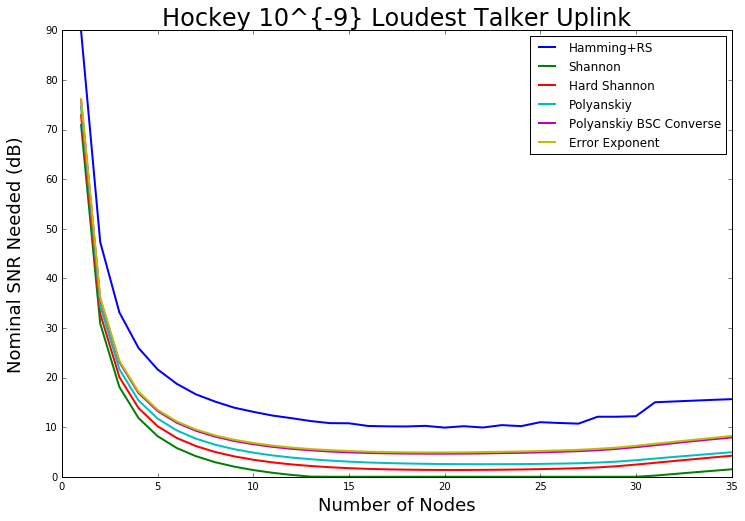

In [9]:
%%time
dSNR = 0.01
target = 10**(-9)
paddratio = 0.1 # padd = 10**(-10)
start_SNR = 0
start_nodes, end_nodes = 1, 36

shannonscheme = '../data_tables/shannon_tables'
hardshannonscheme = '../data_tables/hard_shannon_tables'
hsrsscheme = '../data_tables/hs_rs_uplink'
polyscheme = '../data_tables/polyanskiy_up'
bscscheme = '../data_tables/poly_bsc_converse/up'
expscheme = '../data_tables/error_exp/up'

shannon_up = uplink(shannonscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
hardshannon_up = uplink(hardshannonscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
hsrs_up = uplink(hsrsscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
polyanskiy_up = uplink(polyscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
bsc_up = uplink(bscscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
exp_up = uplink(expscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)

user_range = range(start_nodes, end_nodes)

figure(figsize=(12, 8))
plot(user_range, hsrs_up, lw=2.0, label='Hamming+RS')
plot(user_range, shannon_up, lw=2.0, label='Shannon')
plot(user_range, hardshannon_up, lw=2.0, label='Hard Shannon')
plot(user_range, polyanskiy_up, lw=2.0, label='Polyanskiy')
plot(user_range, bsc_up, lw=2.0, label='Polyanskiy BSC Converse')
plot(user_range, exp_up, lw=2.0, label='Error Exponent')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Nominal SNR Needed (dB)', fontsize=18, labelpad=20)
title('Hockey 10^{-9} Loudest Talker Uplink', fontsize=24)
savefig('hockey_uplink_loudest.pdf', bbox='tight')

## Loudest Talker Penalties

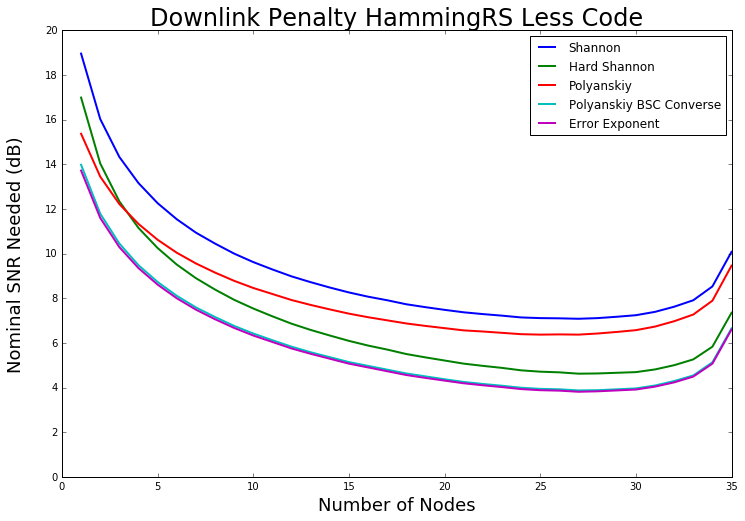

In [14]:
figure(figsize=(12, 8))
plot(user_range, hsrs_down-shannon_down, lw=2.0, label='Shannon')
plot(user_range, hsrs_down-hardshannon_down, lw=2.0, label='Hard Shannon')
plot(user_range, hsrs_down-polyanskiy_down, lw=2.0, label='Polyanskiy')
plot(user_range, hsrs_down-bsc_down, lw=2.0, label='Polyanskiy BSC Converse')
plot(user_range, hsrs_down-exp_down, lw=2.0, label='Error Exponent')
legend(loc=0)
ylim([0, 20])
yticks(arange(0, 21, 2))
xlabel('Number of Nodes', fontsize=18)
ylabel('Nominal SNR Needed (dB)', fontsize=18, labelpad=20)
title('Downlink Penalty HammingRS Less Code', fontsize=24)
savefig('hockey_loudest_penalty.pdf', bbox='tight')

# Uplink Penalties

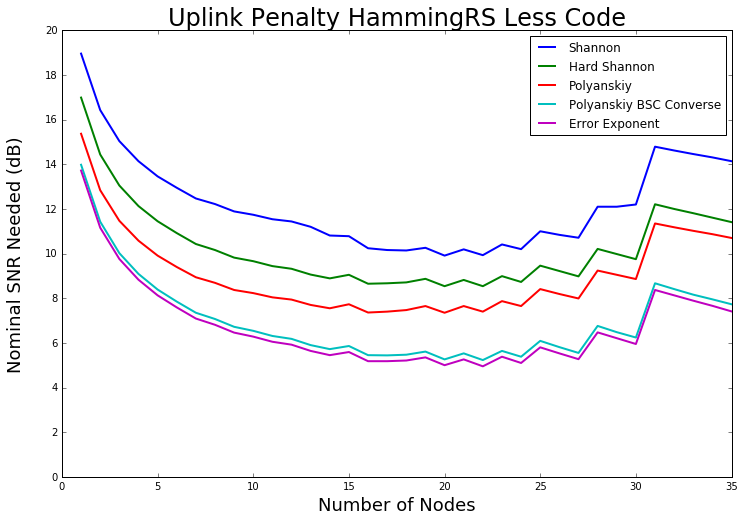

In [15]:
figure(figsize=(12, 8))
plot(user_range, hsrs_up-shannon_up, lw=2.0, label='Shannon')
plot(user_range, hsrs_up-hardshannon_up, lw=2.0, label='Hard Shannon')
plot(user_range, hsrs_up-polyanskiy_up, lw=2.0, label='Polyanskiy')
plot(user_range, hsrs_up-bsc_up, lw=2.0, label='Polyanskiy BSC Converse')
plot(user_range, hsrs_up-exp_up, lw=2.0, label='Error Exponent')
legend(loc=0)
ylim([0, 20])
yticks(arange(0, 21, 2))
xlabel('Number of Nodes', fontsize=18)
ylabel('Nominal SNR Needed (dB)', fontsize=18, labelpad=20)
title('Uplink Penalty HammingRS Less Code', fontsize=24)
savefig('hockey_uplink_loudest_penalty.pdf', bbox='tight')

# Energy Combining

In [3]:
%%time

threshold = 10**(-9)
endpoint = 2
dfade = [10**(-3), 10**(-10), 10**(-3)]
dSNR = 0.1
start_nodes, end_nodes = 1, 35

print "Hamming RS"
hsrs_codingscheme = '../data_tables/hs_rs_downlink'
hsrs_start_SNR = 0
hsrs_ecc = energy_combining(hsrs_codingscheme, dSNR, dfade, endpoint, threshold, hsrs_start_SNR, start_nodes, end_nodes)
print hsrs_ecc
print ""

print "Shannon"
shannon_codingscheme = '../data_tables/shannon_tables'
shannon_start_SNR = -2
shannon_ecc = energy_combining(shannon_codingscheme, dSNR, dfade, endpoint, threshold, shannon_start_SNR, start_nodes, end_nodes)
print shannon_ecc
print ""

print "Hard Shannon"
hardshannon_codingscheme = '../data_tables/hard_shannon_tables'
hardshannon_start_SNR = -1
hardshannon_ecc = energy_combining(hardshannon_codingscheme, dSNR, dfade, endpoint, threshold, hardshannon_start_SNR, start_nodes, end_nodes)
print hardshannon_ecc
print ""

Hamming RS


<string>:118: RuntimeWarning: divide by zero encountered in log10
<string>:122: RuntimeWarning: divide by zero encountered in log10
<string>:126: RuntimeWarning: divide by zero encountered in log10


('P(protocol)', 1, 88.69999999999924, 9.899003667855336e-10)


<string>:137: RuntimeWarning: divide by zero encountered in log10
<string>:142: RuntimeWarning: divide by zero encountered in log10
<string>:147: RuntimeWarning: divide by zero encountered in log10


('P(protocol)', 2, 46.000000000000384, 9.6083006566007613e-10)
('P(protocol)', 3, 31.500000000000178, 9.5488041921071473e-10)
('P(protocol)', 4, 25.600000000000094, 9.6867755832444733e-10)
('P(protocol)', 5, 20.30000000000002, 9.5607225034860108e-10)
('P(protocol)', 6, 17.099999999999973, 9.5964420904178462e-10)
('P(protocol)', 7, 14.899999999999963, 9.0776837038697074e-10)
('P(protocol)', 8, 13.199999999999969, 9.34405319117958e-10)
('P(protocol)', 9, 11.899999999999974, 8.8772404518811528e-10)
('P(protocol)', 10, 10.799999999999978, 9.8484512360632357e-10)
('P(protocol)', 11, 9.99999999999998, 8.6337531335217256e-10)
('P(protocol)', 12, 9.299999999999983, 8.0019432681302991e-10)
('P(protocol)', 13, 8.699999999999985, 7.948159948000264e-10)
('P(protocol)', 14, 8.199999999999987, 7.6911930792760594e-10)
('P(protocol)', 15, 7.699999999999989, 8.8635671776859416e-10)
('P(protocol)', 16, 7.29999999999999, 9.6395355769461238e-10)
('P(protocol)', 17, 6.999999999999991, 8.9705448963451621e-1

In [4]:
print "Polyanskiy"
poly_codingscheme = '../data_tables/polyanskiy_down'
poly_start_SNR = -2
poly_ecc = energy_combining(poly_codingscheme, dSNR, dfade, endpoint, threshold, poly_start_SNR, start_nodes, end_nodes)
print poly_ecc
print ""

print "Polyanskiy BSC"
bsc_codingscheme = '../data_tables/poly_bsc/down'
bsc_start_SNR = -2
bsc_ecc = energy_combining(bsc_codingscheme, dSNR, dfade, endpoint, threshold, bsc_start_SNR, start_nodes, end_nodes)
print bsc_ecc
print ""

Polyanskiy
('P(protocol)', 1, 70.80000000000025, 9.8590589235008118e-10)
('P(protocol)', 2, 31.000000000000174, 9.6067535922425539e-10)
('P(protocol)', 3, 18.199999999999992, 9.4679596768351783e-10)
('P(protocol)', 4, 13.39999999999997, 9.120763487650852e-10)
('P(protocol)', 5, 8.999999999999986, 9.6815448754553112e-10)
('P(protocol)', 6, 6.599999999999993, 9.1583765167649202e-10)
('P(protocol)', 7, 4.8999999999999995, 9.8535365927546059e-10)
('P(protocol)', 8, 3.800000000000003, 8.5668129085013264e-10)
('P(protocol)', 9, 2.900000000000002, 8.8004603952029937e-10)
('P(protocol)', 10, 2.2000000000000015, 9.2467607845316571e-10)
('P(protocol)', 11, 1.7000000000000013, 8.6750302957919607e-10)
('P(protocol)', 12, 1.300000000000001, 8.244369072683544e-10)
('P(protocol)', 13, 0.9000000000000006, 9.7448408441537152e-10)
('P(protocol)', 14, 0.7000000000000006, 7.9377901885278373e-10)
('P(protocol)', 15, 0.4000000000000007, 9.9977926827680297e-10)
('P(protocol)', 16, 0.30000000000000066, 7.7065

In [9]:
print "Error Exponent"
exp_codingscheme = '../data_tables/error_exp/down'
exp_start_SNR = -2
exp_ecc = energy_combining(exp_codingscheme, dSNR, dfade, endpoint, threshold, exp_start_SNR, start_nodes, end_nodes)
print exp_ecc
print ""

Error Exponent
('P(protocol)', 1, 73.4000000000001, 9.9522916189198505e-10)
('P(protocol)', 2, 33.400000000000205, 9.9294928475793571e-10)
('P(protocol)', 3, 20.600000000000026, 9.461865401394485e-10)
('P(protocol)', 4, 15.799999999999962, 9.170711086100241e-10)
('P(protocol)', 5, 11.399999999999977, 8.9503249413307688e-10)
('P(protocol)', 6, 8.899999999999986, 9.3926466392650477e-10)
('P(protocol)', 7, 7.299999999999991, 8.6436835238852256e-10)
('P(protocol)', 8, 6.099999999999995, 8.7789033235174746e-10)
('P(protocol)', 9, 5.199999999999998, 9.0553223804886025e-10)
('P(protocol)', 10, 4.500000000000001, 9.6176176741365978e-10)
('P(protocol)', 11, 4.000000000000003, 9.1800247483924365e-10)
('P(protocol)', 12, 3.6000000000000028, 8.9347658741481017e-10)
('P(protocol)', 13, 3.3000000000000025, 8.2970115434553296e-10)
('P(protocol)', 14, 3.000000000000002, 9.2227494766827069e-10)
('P(protocol)', 15, 2.800000000000002, 8.9521925558369207e-10)
('P(protocol)', 16, 2.600000000000002, 9.89829

In [5]:
%%time

threshold = 10**(-9)
endpoint = 2
dfade = [10**(-3), 10**(-10), 10**(-3)]
dSNR = 0.1
start_nodes, end_nodes = 1, 35

print "Polyanskiy BSC Converse"
bsc_codingscheme = '../data_tables/poly_bsc_converse/down'
bsc_start_SNR = -2
bsc_ecc = energy_combining(bsc_codingscheme, dSNR, dfade, endpoint, threshold, bsc_start_SNR, start_nodes, end_nodes)
print bsc_ecc
print ""

Polyanskiy BSC Converse


<string>:118: RuntimeWarning: divide by zero encountered in log10
<string>:122: RuntimeWarning: divide by zero encountered in log10
<string>:126: RuntimeWarning: divide by zero encountered in log10


('P(protocol)', 1, 72.60000000000015, 9.9038225776075175e-10)


<string>:137: RuntimeWarning: divide by zero encountered in log10
<string>:142: RuntimeWarning: divide by zero encountered in log10
<string>:147: RuntimeWarning: divide by zero encountered in log10


('P(protocol)', 2, 32.9000000000002, 9.6187959870843654e-10)
('P(protocol)', 3, 30.300000000000164, 8.4824911569807153e-13)
('P(protocol)', 4, 15.399999999999963, 8.5561101493687896e-10)
('P(protocol)', 5, 10.999999999999979, 9.515878461763402e-10)
('P(protocol)', 6, 8.599999999999987, 9.1847973366325191e-10)
('P(protocol)', 7, 6.999999999999992, 8.695033183426314e-10)
('P(protocol)', 8, 5.799999999999996, 9.1371597912398803e-10)
('P(protocol)', 9, 4.8999999999999995, 9.7739854850444226e-10)
('P(protocol)', 10, 4.300000000000002, 8.6578017521575883e-10)
('P(protocol)', 11, 3.800000000000003, 8.4070738681137398e-10)
('P(protocol)', 12, 3.4000000000000026, 8.3353162408304684e-10)
('P(protocol)', 13, 3.1000000000000023, 7.8857154182758911e-10)
('P(protocol)', 14, 2.800000000000002, 8.9169269891817575e-10)
('P(protocol)', 15, 2.600000000000002, 8.8306770611380112e-10)
('P(protocol)', 16, 2.4000000000000017, 9.9472897323461813e-10)
('P(protocol)', 17, 2.3000000000000016, 9.036672324305017e-

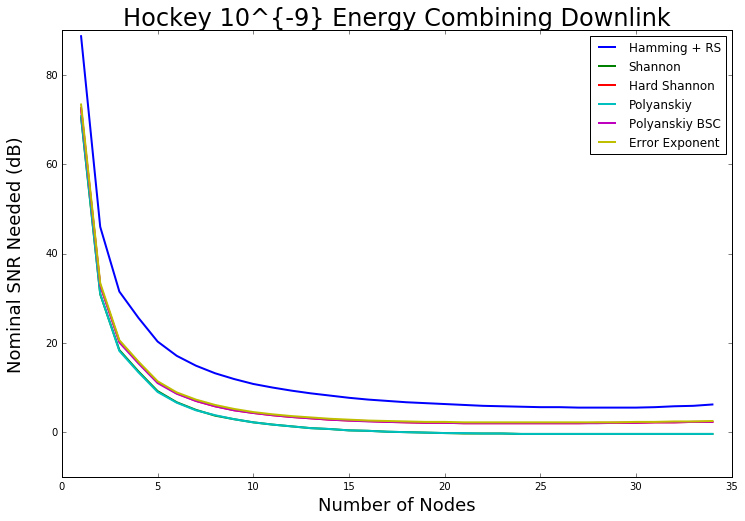

In [11]:
figure(figsize=(12, 8))
user_range = range(start_nodes, end_nodes)
plot(user_range, hsrs_ecc, lw=2.0, label='Hamming + RS')
plot(user_range, shannon_ecc, lw=2.0, label='Shannon')
plot(user_range, hardshannon_ecc, lw=2.0, label='Hard Shannon')
plot(user_range, poly_ecc, lw=2.0, label='Polyanskiy')
plot(user_range, bsc_ecc, lw=2.0, label='Polyanskiy BSC')
plot(user_range, exp_ecc, lw=2.0, label='Error Exponent')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Nominal SNR Needed (dB)', fontsize=18, labelpad=20)
title('Hockey 10^{-9} Energy Combining Downlink', fontsize=24)
savefig('hockey_downlink_ecc.pdf', bbox='tight')

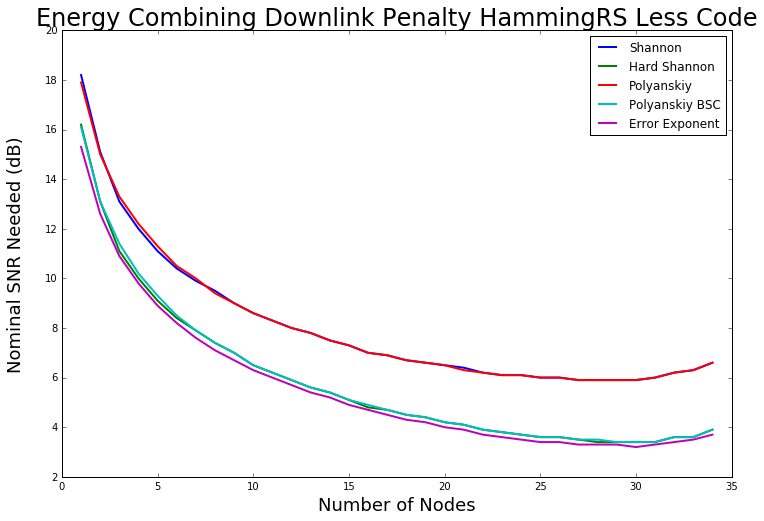

In [12]:
figure(figsize=(12, 8))
user_range = range(start_nodes, end_nodes)
plot(user_range, hsrs_ecc-shannon_ecc, lw=2.0, label='Shannon')
plot(user_range, hsrs_ecc-hardshannon_ecc, lw=2.0, label='Hard Shannon')
plot(user_range, hsrs_ecc-poly_ecc, lw=2.0, label='Polyanskiy')
plot(user_range, hsrs_ecc-bsc_ecc, lw=2.0, label='Polyanskiy BSC')
plot(user_range, hsrs_ecc-exp_ecc, lw=2.0, label='Error Exponent')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Nominal SNR Needed (dB)', fontsize=18, labelpad=20)
title('Energy Combining Downlink Penalty HammingRS Less Code', fontsize=24)
savefig('hockey_downlink_ecc_penalty.pdf', bbox='tight')